In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objects as go

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa.stattools import * 

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  

In [3]:
df = pd.read_csv('5627A-od.csv', sep=';', decimal=",")
df.rename(df.loc[:, 'time'], axis='index',  inplace = True)  
df.rename({'time': 'Day','oil': 'Oil', 'total': 'Total', 'pump1': 'P1', 'pump2': 'P2', 'pump3': 'P3', 'pump4':'P4', 'pump5':'P5', 'pump6':'P6'}, axis='columns', inplace = True)
df.drop(columns = 'Day', inplace = True)
df

,Oil,Total,P1,P2,P3,P4,P5,P6
215,6.512890,7.164179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
216,5.225806,5.741935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
217,5.724138,6.310345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
218,6.354839,7.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
219,7.633333,8.433333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
220,8.096774,8.967742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
221,9.249284,10.246418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
222,9.322581,9.838710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
223,6.741935,7.129032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
224,6.986072,7.387187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### Proportion in tables can be NAN, let's smoth data a little bit

In [4]:
plt.rcParams["figure.figsize"] =(18,6)

for i in range(215, 665):
    df.loc[i, 'Prop'] = df.loc[i, 'Oil']/df.loc[i, 'Total']

for i in range(215, 665):
    if np.isnan(df.loc[i, 'Prop']):
        j = i+1
        while np.isnan(df.loc[j, 'Prop']):
            j+=1     
        n = j-i
        s = (df.loc[j, 'Prop'] - df.loc[i-1, 'Prop'])/n
        for k in range(n):
            df.loc[i, 'Prop'] = df.loc[i-1, 'Prop'] + s*k

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in double_scalars



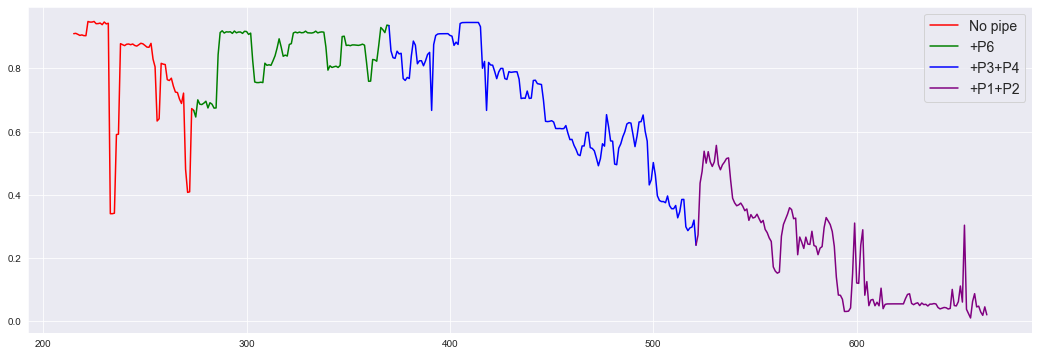

In [5]:
plt.plot(df.Prop.loc[215:274], color = 'red', label = 'No pipe')
plt.plot(df.Prop.loc[274:370], color = 'green', label = '+P6')
plt.plot(df.Prop.loc[370:521], color = 'blue', label = '+P3+P4')
plt.plot(df.Prop.loc[521:665], color = 'purple', label = '+P1+P2')
plt.legend(fontsize = 14)



In [11]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x= df.Prop.loc[215:274].index, y= df.Prop.loc[215:274], mode= 'lines+markers', opacity = 0.9, 
#                  name = 'Насосы не работают', marker=dict(color='red', size=4)))

# fig.add_trace(go.Scatter(x= df.Prop.loc[274:370].index, y= df.Prop.loc[274:370], mode= 'lines+markers', opacity = 0.9, 
#                  name = 'Работает только 6-ый насос', marker=dict(color='green', size=4)))

# fig.add_trace(go.Scatter(x= df.Prop.loc[370:521].index, y= df.Prop.loc[370:521], mode= 'lines+markers', opacity = 0.9, 
#                  name = 'Работает с 3-ого по 4-ый насос ', marker=dict(color='blue', size=4)))

# fig.add_trace(go.Scatter(x= df.Prop.loc[521:665].index, y= df.Prop.loc[521:665], mode= 'lines+markers', opacity = 0.9, 
#                  name = 'Работают все насосы', marker=dict(color='darkorange', size=4)))

fig.update_layout(
    legend_orientation="h",
    font=dict(
            family="sans-serif",
            size=24,
            color="black"
        ),
    width=1920,
    height=1080, 

    plot_bgcolor='rgba(240, 240, 240, 0.7)')
fig.show()

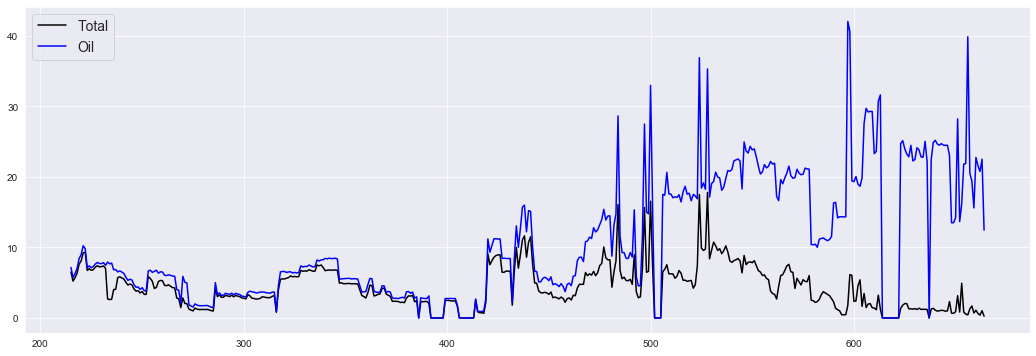

In [7]:
plt.plot(df.Oil, color = 'black', label = 'Total')
plt.plot(df.Total, color = 'blue', label = 'Oil')
plt.legend(fontsize = 14)

In [10]:
import chart_studio.plotly as py
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x= df.index, y= df.Oil, mode= 'lines+markers', opacity = 0.9, 
                 name = 'Дебит нефти', marker=dict(color='Black', size=4)))

fig.add_trace(go.Scatter(x= df.index, y= df.Total, mode= 'lines+markers', opacity = 0.9, 
                 name = 'Всего было выкачано жидкости', marker=dict(color='Blue', size=4)))

fig.update_layout(
    legend_orientation="h",
#     font=dict(
#             family="sans-serif",
#             size=24,
#             color="black"
#         ),
#     width=1920,
#     height=1080, 
#     plot_bgcolor='rgba(240, 240, 240, 0.7)'
)
fig.show()

##### Regular analysis

In [8]:
df.describe()

,Oil,Total,P1,P2,P3,P4,P5,P6,Prop
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,4.338414,10.749552,11.403930,10.385027,25.880078,25.032271,37.235626,62.180826,0.574632
std,3.003293,8.492477,30.955681,25.527427,49.344454,46.515691,60.799914,168.518489,0.307128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010879
25%,2.260851,3.743952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320738
50%,3.814583,7.748493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.637270
75%,6.478746,17.562266,0.000000,0.000000,43.451930,37.645406,66.166971,37.530750,0.866868
max,17.809785,42.061861,198.000000,234.318021,606.084507,342.500000,617.684211,1434.000000,0.947644


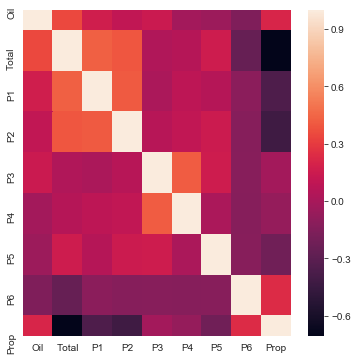

In [9]:
plt.rcParams["figure.figsize"] =(6,6)
sns.heatmap(df.corr())

In [10]:
df.cov()

,Oil,Total,P1,P2,P3,P4,P5,P6,Prop
Oil,9.019770,8.871236,15.684060,7.731576,21.575713,-2.102294,-8.335584,-77.697650,0.192199
Total,8.871236,72.122167,112.205377,86.089210,15.746994,22.598732,80.504152,-368.187617,-1.842716
P1,15.684060,112.205377,958.254200,326.508316,26.630310,129.698710,107.397443,-590.563135,-3.371596
P2,7.731576,86.089210,326.508316,651.649539,82.454595,122.226758,231.055503,-563.026180,-3.294916
P3,21.575713,15.746994,26.630310,82.454595,2434.875101,959.846265,472.107240,-1004.736314,-0.277069
P4,-2.102294,22.598732,129.698710,122.226758,959.846265,2163.709495,48.142761,-1028.470605,-1.019397
P5,-8.335584,80.504152,107.397443,231.055503,472.107240,48.142761,3696.629551,-1262.184171,-4.046146
P6,-77.697650,-368.187617,-590.563135,-563.026180,-1004.736314,-1028.470605,-1262.184171,28398.481177,12.137619
Prop,0.192199,-1.842716,-3.371596,-3.294916,-0.277069,-1.019397,-4.046146,12.137619,0.094328


In [11]:
df.corr()

,Oil,Total,P1,P2,P3,P4,P5,P6,Prop
Oil,1.000000,0.347818,0.168702,0.100847,0.145589,-0.015049,-0.045649,-0.153519,0.208369
Total,0.347818,1.000000,0.426814,0.397107,0.037577,0.057207,0.155912,-0.257269,-0.706487
P1,0.168702,0.426814,1.000000,0.413187,0.017434,0.090073,0.057062,-0.113208,-0.354630
P2,0.100847,0.397107,0.413187,1.000000,0.065459,0.102934,0.148870,-0.130880,-0.420259
P3,0.145589,0.037577,0.017434,0.065459,1.000000,0.418181,0.157362,-0.120828,-0.018282
P4,-0.015049,0.057207,0.090073,0.102934,0.418181,1.000000,0.017023,-0.131203,-0.071355
P5,-0.045649,0.155912,0.057062,0.148870,0.157362,0.017023,1.000000,-0.123189,-0.216680
P6,-0.153519,-0.257269,-0.113208,-0.130880,-0.120828,-0.131203,-0.123189,1.000000,0.234512
Prop,0.208369,-0.706487,-0.354630,-0.420259,-0.018282,-0.071355,-0.216680,0.234512,1.000000


In [12]:
#Вручную
Cov = []
for i in range(0, 9):
    row = []
    for j in range(0, i):
        row.append(Cov[j][i])
    for j in range(i, 9):
        row.append((df.iloc[:, j]*df.iloc[:, i]).mean() - df.iloc[:, i].mean()*df.iloc[:, j].mean()) #смещенная оценка
        
    Cov.append(row)

dfCov = pd.DataFrame(Cov)

dfCov.rename({0: 'Oil', 1: 'Total', 2: 'P1', 3: 'P2', 4: 'P3', 5: 'P4', 6: 'P5', 7: 'P6', 8: 'Water'}, axis='columns', inplace = True)
dfCov.rename({0: 'Oil', 1: 'Total', 2: 'P1', 3: 'P2', 4: 'P3', 5: 'P4', 6: 'P5', 7: 'P6', 8: 'Water'}, axis='rows', inplace = True)

dfCov

,Oil,Total,P1,P2,P3,P4,P5,P6,Water
Oil,8.999726,8.851522,15.649207,7.714395,21.527767,-2.097622,-8.317061,-77.524988,0.191772
Total,8.851522,71.961895,111.956032,85.897901,15.712001,22.548512,80.325254,-367.369423,-1.838621
P1,15.649207,111.956032,956.124747,325.782742,26.571131,129.410490,107.158782,-589.250772,-3.364103
P2,7.714395,85.897901,325.782742,650.201429,82.271362,121.955143,230.542046,-561.775011,-3.287594
P3,21.527767,15.712001,26.571131,82.271362,2429.464267,957.713273,471.058113,-1002.503567,-0.276453
P4,-2.097622,22.548512,129.410490,121.955143,957.713273,2158.901252,48.035777,-1026.185115,-1.017131
P5,-8.317061,80.325254,107.158782,230.542046,471.058113,48.035777,3688.414818,-1259.379317,-4.037155
P6,-77.524988,-367.369423,-589.250772,-561.775011,-1002.503567,-1026.185115,-1259.379317,28335.373441,12.110647
Water,0.191772,-1.838621,-3.364103,-3.287594,-0.276453,-1.017131,-4.037155,12.110647,0.094118


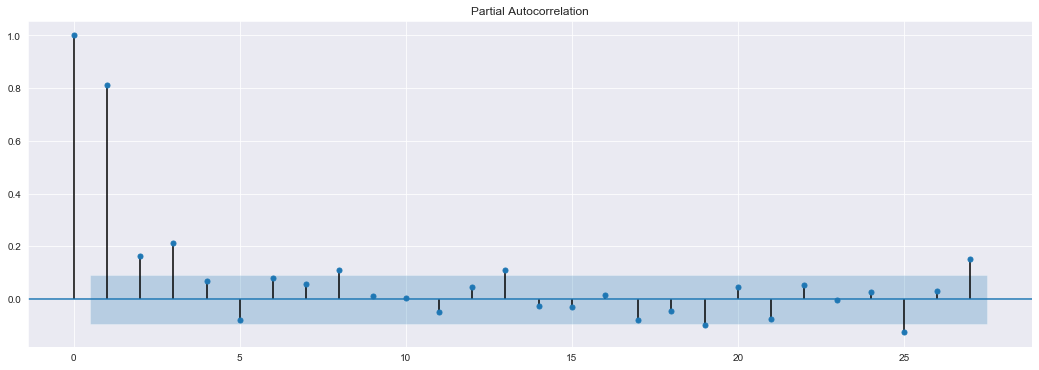

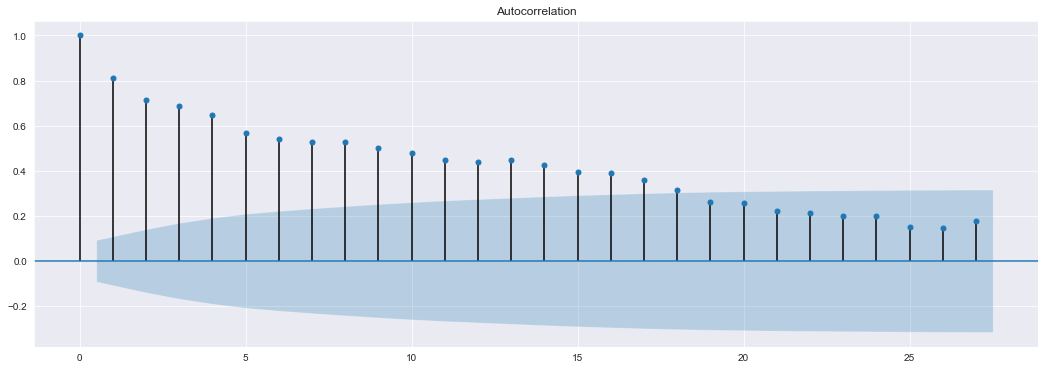

[ True  True  True  True  True False  True  True  True False False False
  True  True False False False False False False False False  True False
 False False False  True False False False  True False False False False
 False False False False False]


In [13]:
plt.rcParams["figure.figsize"] =(18,6)
f_pacf = plot_pacf(df.Oil)
f_acf = plot_acf(df.Oil)
plt.show()
print(pacf(df.Oil)>1/np.sqrt(len(df.Oil)))

In [14]:
for i in range(4):
    ARMA = sm.tsa.ARIMA(df.Oil, order=(i,0,0)).fit(full_output=False, disp=0)
    print('AR order ', i)
    print('MSE', mean_squared_error(ARMA.predict(), df.Oil))

AR order  0
MSE 8.999725705662255
AR order  1
MSE 3.056270185699428


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



AR order  2
MSE 2.9768907647666443
AR order  3
MSE 2.841096419230966


In [15]:
df.to_csv(path_or_buf = 'Clean_data.csv')